### Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [273]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [274]:
df.shape

(614, 13)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [276]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [277]:
[i for i in df.columns if df[i].isnull().sum()>0]

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [278]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [279]:
df_need_to_impute = df.drop(['Loan_ID','LoanAmount','Loan_Amount_Term'],axis=1)

In [280]:
Missing_Data = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']

In [281]:
for i in Missing_Data:
    df_need_to_impute[i] = df_need_to_impute[i].fillna(df_need_to_impute[i].dropna().mode()[0])

In [282]:
[i for i in df_need_to_impute.columns if df_need_to_impute[i].isnull().sum()>0]

[]

In [283]:
from sklearn.ensemble import RandomForestRegressor
df_imp = df.loc[:,['LoanAmount', 'Loan_Amount_Term']]

In [284]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [285]:
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df_imp)
df_imputed = pd.DataFrame(imputed, columns=df_imp.columns)

In [286]:
df_need_to_impute

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.000000,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.000000,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.000000,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.000000,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.000000,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.000000,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.000000,1.0,Semiurban,N


In [287]:
df_final = pd.concat([df_need_to_impute,df_imputed],axis=1)

In [288]:
[i for i in df_final.columns if df_final[i].isnull().sum()>0]

[]

In [289]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    object 
 9   Loan_Status        614 non-null    object 
 10  LoanAmount         614 non-null    float64
 11  Loan_Amount_Term   614 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

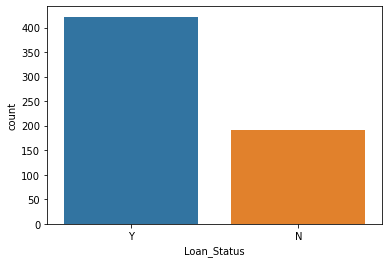

In [95]:
sns.countplot(df_final.Loan_Status)

<AxesSubplot:xlabel='Gender', ylabel='count'>

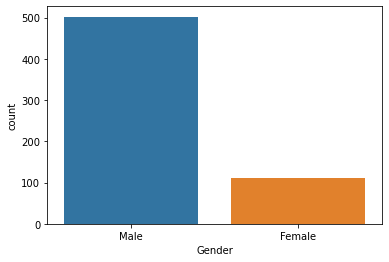

In [99]:
sns.countplot(df_final['Gender'])

In [109]:
df_category = df_final.drop(['ApplicantIncome','CoapplicantIncome','Credit_History','LoanAmount','Loan_Amount_Term'],axis=1)

In [114]:
df_continous = df_final.loc[:,['ApplicantIncome','CoapplicantIncome','Credit_History','LoanAmount','Loan_Amount_Term']]

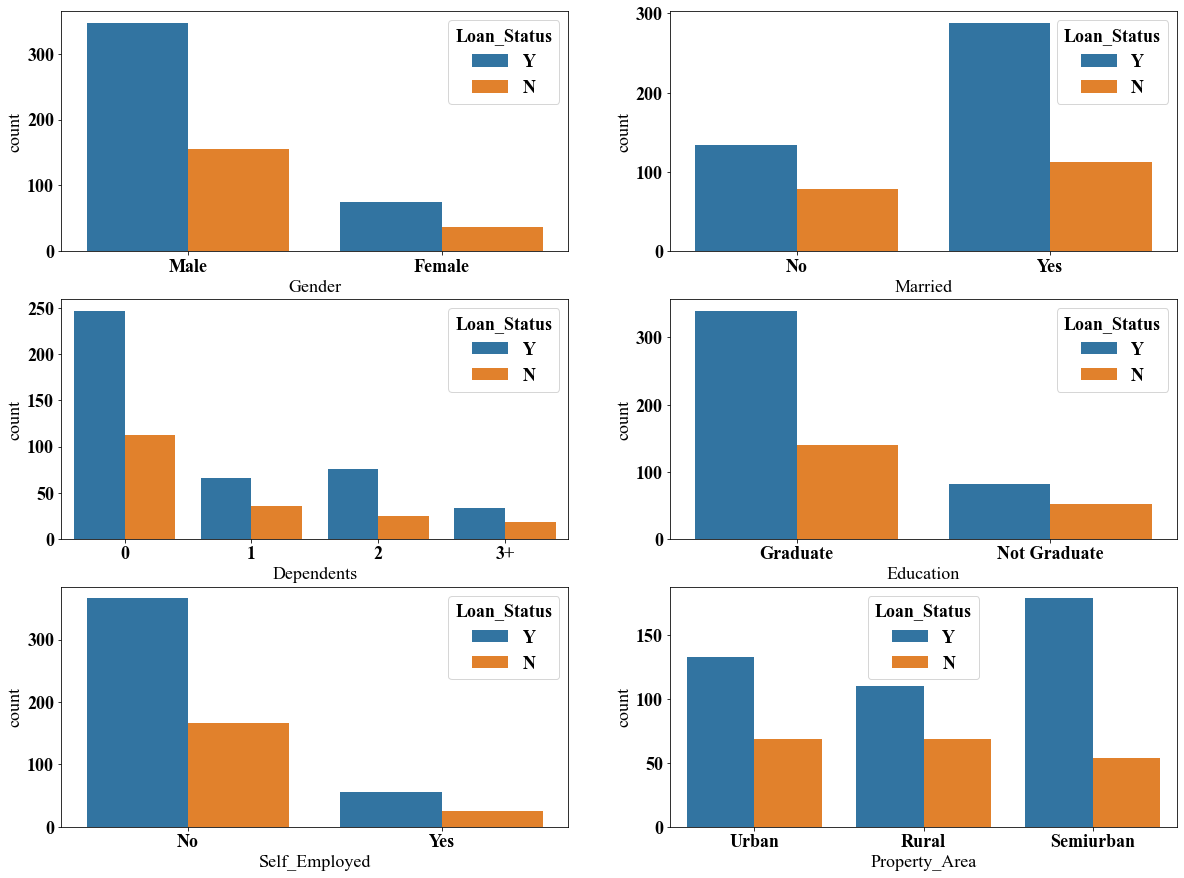

In [141]:
fig , ax = plt.subplots(3,2,figsize = (20,15))
for i , subplots in zip (df_category , ax.flatten()):
    sns.countplot(df_category[i],hue=df_category['Loan_Status'],ax = subplots)
plt.show()

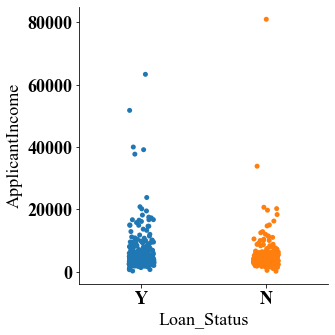

In [176]:
sns.catplot(y='ApplicantIncome',x='Loan_Status',data=df_final)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

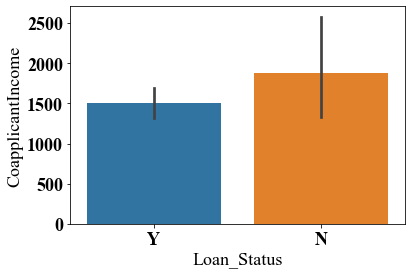

In [151]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df_final)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

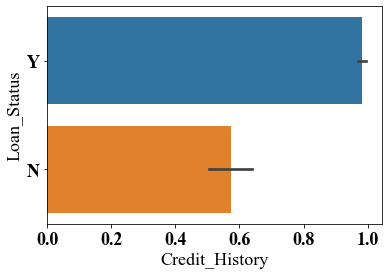

In [161]:
sns.barplot(x='Credit_History',y='Loan_Status',data=df_final)

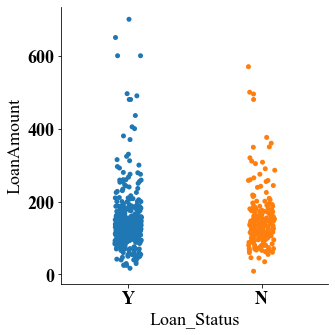

In [167]:
sns.catplot(y='LoanAmount',x='Loan_Status',data=df_final)

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

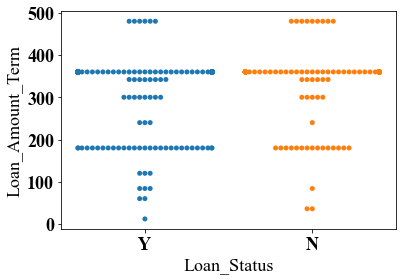

In [165]:
sns.swarmplot(y='Loan_Amount_Term',x='Loan_Status',data=df_final)

In [182]:
cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
       'Property_Area', 'Loan_Status', 'LoanAmount', 'Loan_Amount_Term']

In [291]:
lab = LabelEncoder()
for i in df_category.columns:
    df_final[i] = lab.fit_transform(df_final[i])

print(df_final.dtypes)

Gender               int32  
Married              int32  
Dependents           int32  
Education            int32  
Self_Employed        int32  
ApplicantIncome      int64  
CoapplicantIncome    float64
Credit_History       float64
Property_Area        int32  
Loan_Status          int32  
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object


In [292]:
df_final.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.009170,-0.025752,0.017987,0.107942,-0.073549
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.010938,0.004257,0.091478,0.147112,-0.100852
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,-0.040160,-0.000244,0.010118,0.163088,-0.101042
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.073658,-0.065243,-0.085884,-0.167046,-0.077271
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,-0.001550,-0.030860,-0.003700,0.115278,-0.033964
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,-0.018615,-0.009500,-0.004710,0.565624,-0.045231
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.011134,0.010522,-0.059187,0.187824,-0.059671
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,1.000000,0.001963,0.540556,-0.001452,0.000476
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.009500,0.010522,0.001963,1.000000,0.032112,-0.044807,-0.077657
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,-0.004710,-0.059187,0.540556,0.032112,1.000000,-0.036389,-0.020956


<AxesSubplot:>

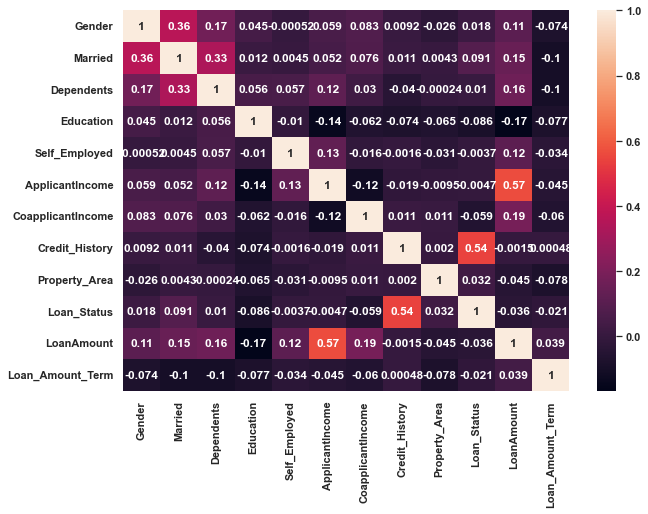

In [293]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_final.corr(),annot=True)

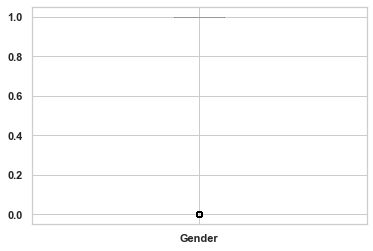

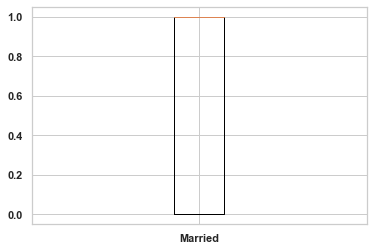

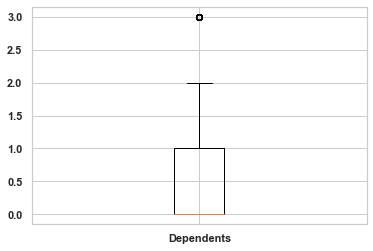

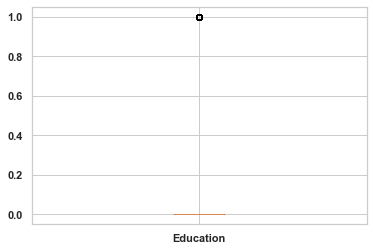

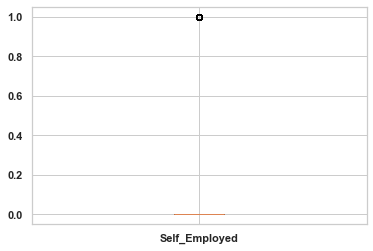

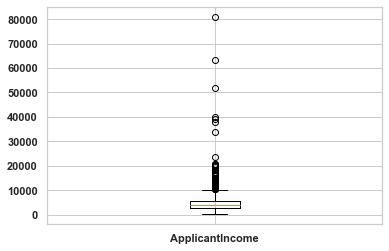

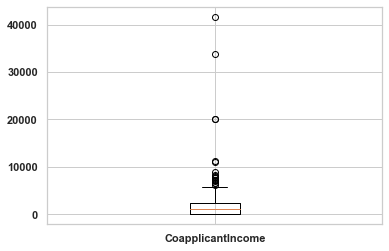

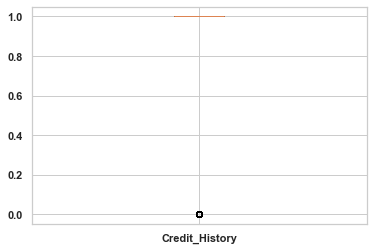

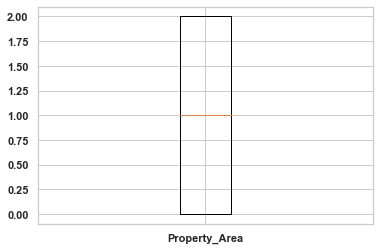

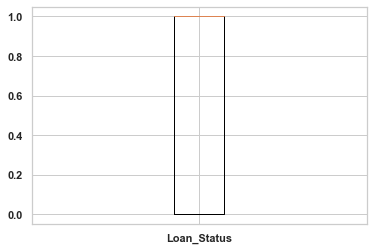

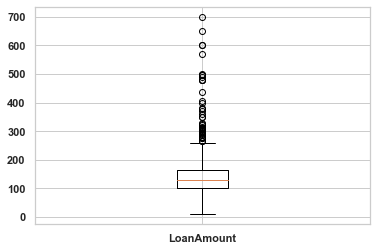

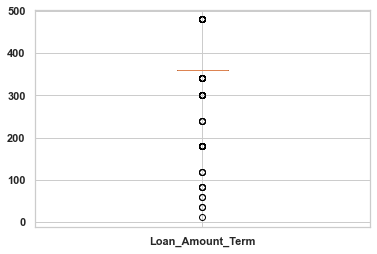

In [294]:
for i in df_final.columns:
    plt.boxplot(df_final[i], labels = [i])
    plt.show()

In [295]:
z = np.abs(zscore(df_final))
print(z)

       Gender   Married  Dependents  Education  Self_Employed  \
0    0.472343  1.372089  0.737806    0.528362   0.392601        
1    0.472343  0.728816  0.253470    0.528362   0.392601        
2    0.472343  0.728816  0.737806    0.528362   2.547117        
3    0.472343  0.728816  0.737806    1.892641   0.392601        
4    0.472343  1.372089  0.737806    0.528362   0.392601        
5    0.472343  0.728816  1.244745    0.528362   2.547117        
6    0.472343  0.728816  0.737806    1.892641   0.392601        
7    0.472343  0.728816  2.236021    0.528362   0.392601        
8    0.472343  0.728816  1.244745    0.528362   0.392601        
9    0.472343  0.728816  0.253470    0.528362   0.392601        
10   0.472343  0.728816  1.244745    0.528362   0.392601        
11   0.472343  0.728816  1.244745    0.528362   0.392601        
12   0.472343  0.728816  1.244745    0.528362   0.392601        
13   0.472343  1.372089  0.737806    0.528362   0.392601        
14   0.472343  0.728816  

In [296]:
threshold = 3
print(np.where(z<3))
print(df_final.shape)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(614, 12)


In [297]:
x_reg = df_final.drop(columns=['Loan_Status'])
y_reg = df_final["Loan_Status"]
print(x_reg.shape)
print(y_reg.shape)

(614, 11)
(614,)


In [298]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(x_reg, y_reg,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.30177249371961523
R2 score for the random state is 42 is 0.1881350482968961
R2 score for the random state is 42 is 0.27916628229601625
R2 score for the random state is 42 is -0.42048346055979624
R2 score for the random state is 42 is -0.23625106022052567
R2 score for the random state is 42 is 0.16366238337574224
R2 score for the random state is 42 is 0.29573075699745566
R2 score for the random state is 43 is 0.3168483364154474
R2 score for the random state is 43 is 0.26017744169564294
R2 score for the random state is 43 is 0.2863950209115881
R2 score for the random state is 43 is -0.40312151616499436
R2 score for the random state is 43 is -0.15237012263099214
R2 score for the random state is 43 is 0.14943000000000006
R2 score for the random state is 43 is 0.3027979710144928
R2 score for the random state is 44 is 0.25223618155946703
R2 score for the random state is 44 is 0.17044597781691484
R2 score for the random state is 44 is 0.085004119241292

In [299]:
reg = LinearRegression(fit_intercept=True,normalize='deprecated',copy_X=True,n_jobs=None,positive=False,)
reg.fit(X_train,y_train)
pred = i.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 score for the random state is" ,r_state ,"is", r2_scores)

R2 score for the random state is 94 is 0.1802487531457333


In [300]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.3055172413793103
Mean squared Error:  0.17390049261083743
Root Mean Absolute Error:  0.5527361408297004


Text(0, 0.5, 'Predicted_Y')

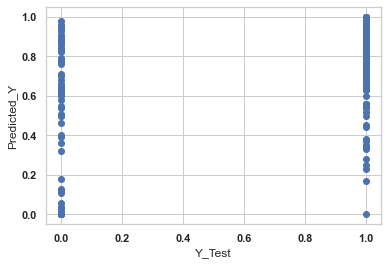

In [301]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [302]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [303]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(x_reg,y_reg,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.6600985221674877
accuracy score correspond to random state  40 is 0.6502463054187192
accuracy score correspond to random state  41 is 0.6995073891625616
accuracy score correspond to random state  41 is 0.5960591133004927
accuracy score correspond to random state  42 is 0.6847290640394089
accuracy score correspond to random state  42 is 0.5714285714285714
accuracy score correspond to random state  43 is 0.6847290640394089
accuracy score correspond to random state  43 is 0.6699507389162561
accuracy score correspond to random state  44 is 0.7192118226600985
accuracy score correspond to random state  44 is 0.6502463054187192
accuracy score correspond to random state  45 is 0.7241379310344828
accuracy score correspond to random state  45 is 0.625615763546798
accuracy score correspond to random state  46 is 0.729064039408867
accuracy score correspond to random state  46 is 0.6206896551724138
accuracy score correspond to random state  47 is 0

In [304]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [309]:
dec = DecisionTreeClassifier(random_state=82)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [310]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=82), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [311]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=82)

In [314]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}

In [315]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_leaf=20, random_state=64)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 84.23645320197043


In [316]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [317]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

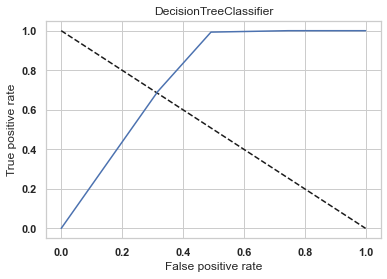

In [318]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [319]:
confusion_matrix(y_test, predc)

array([[ 32,  31],
       [  1, 139]], dtype=int64)

[Text(0.5, 0.8333333333333334, 'X[7] <= 0.5\ngini = 0.431\nsamples = 411\nvalue = [129, 282]'),
 Text(0.25, 0.5, 'X[9] <= 129.0\ngini = 0.191\nsamples = 56\nvalue = [50, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(0.75, 0.5, 'X[8] <= 0.5\ngini = 0.346\nsamples = 355\nvalue = [79, 276]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.44\nsamples = 98\nvalue = [32, 66]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.299\nsamples = 257\nvalue = [47, 210]')]

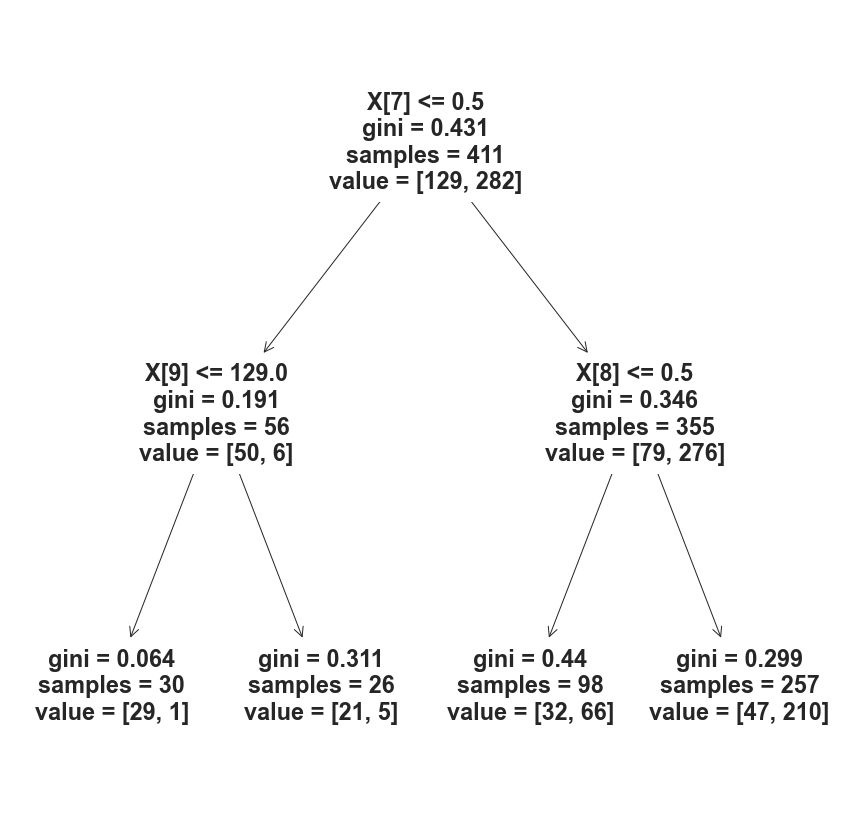

In [320]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(15)
g.set_figheight(15)
tree.plot_tree(DTC)

In [321]:
X_train, X_test, y_train, y_test = train_test_split(x_reg,y_reg,test_size = 0.3, random_state = 12345)

In [322]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))

In [323]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [324]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
accuracy

0.8162162162162162

In [325]:
from sklearn.model_selection import RepeatedStratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(x_reg,y_reg, test_size = 0.3, random_state = 12345)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [326]:
grid_result.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [327]:
grid_result.best_estimator_

LogisticRegression(C=100, solver='newton-cg')

In [328]:
LR = LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')
LR.fit(X_train,y_train)
predc = LR.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 81.62162162162161


### Conclusion
•	Import the Loan Application Status Prediction dataset

•	It contains 614  rows and 13 columns

•	Out of these 9 features were categorical and remaining features were continous


•	In this dataset, the target feature is imbalanced, so we IterativeImputer

•	From the plots, we can come to the following conclusion:
        •	HS-Grads are more
        
        •	Most of the particants are Male,Married, no dependents,graduated,not self employed,mostly from suburban
        
        •	Participants who have been given loan have more ApplicantIncome,less CoapplicantIncome,more Credit_History
        
        •	Participants who have been given loan have asked for Loan_Amount_Term
        
        
        
•	From the heatmap, we find that Age,Education_num,Hours_per_week are highly corelated when compared to others

•	Categories features are converted to continuous features by using Label encoding

•	If skewness is more than 0.55 it is transformed logarithmically



The model is evaluated by using regression

    •	Of the regression algorithms:
    
    •	LinearRegression of random state 69 give more accuracy
    
    •	So cross validation is done using GridSearchCV
    
    •	From this we get the best parameters, final R2 Score : 18.
    
            1.	Mean Absolute Error:  0.3055172413793103
            2.  Mean squared Error:  0.17390049261083743
            3.  Root Mean Absolute Error:  0.55273614082970041
            
The DecisionTreeClassifier algorithm is evaluated :

            1.	DecisionTreeClassifier gives more accuracy Accuracy Score : 84.236
            and is cross validated.
            
            
            

Thus, we conclude that DecisionTreeClassifier algorithm gives the maximum accuracy of 84% and the attribution of the Loan Application Status Prediction can be predicted by this algorithm